In [1]:
from SequentialPOVMMeasurement import SequentialPOVMMeasurement
import qiskit
from qiskit import *
from utilities import simple_povm_xyz, povm_tetrahedron, scale_noise
from ProbabilisticMeasurement import ProbabilisticMeasurement
from qiskit import IBMQ
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise.noise_model import NoiseModel
from qiskit.providers.aer.noise import ReadoutError
import numpy as np

In [2]:
IBMQ.load_account()

# Device to be simulated
dev = IBMQ.get_provider().get_backend("ibmq_manila")

# Extracted simulator for the device
sim = AerSimulator.from_backend(dev)

# noise model of the simulator
noise_model = NoiseModel().from_backend(dev)

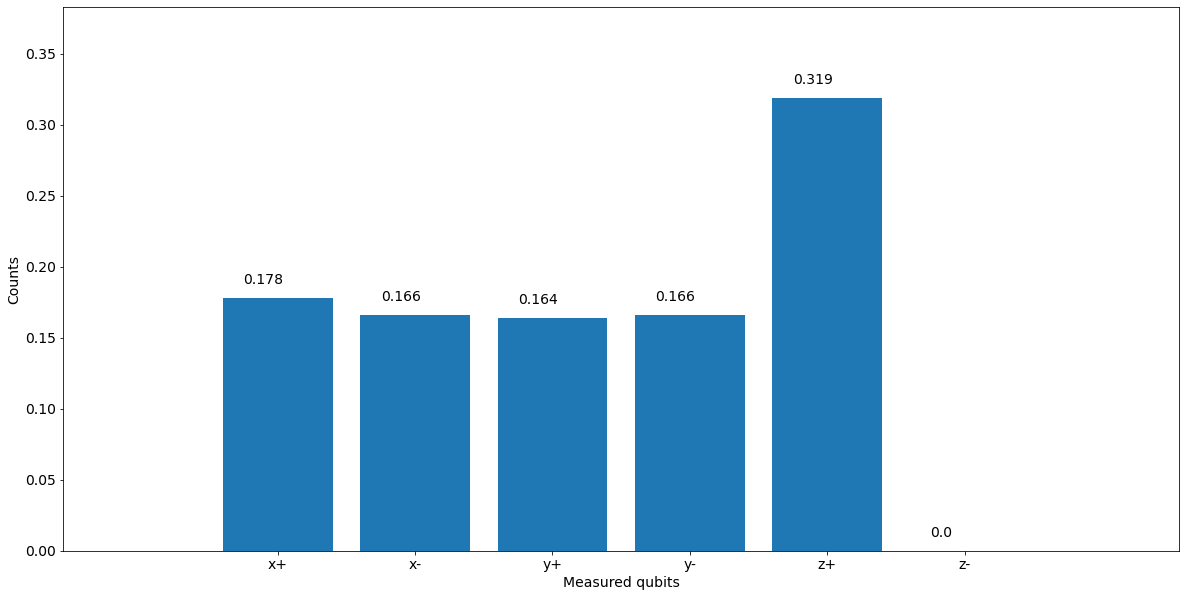

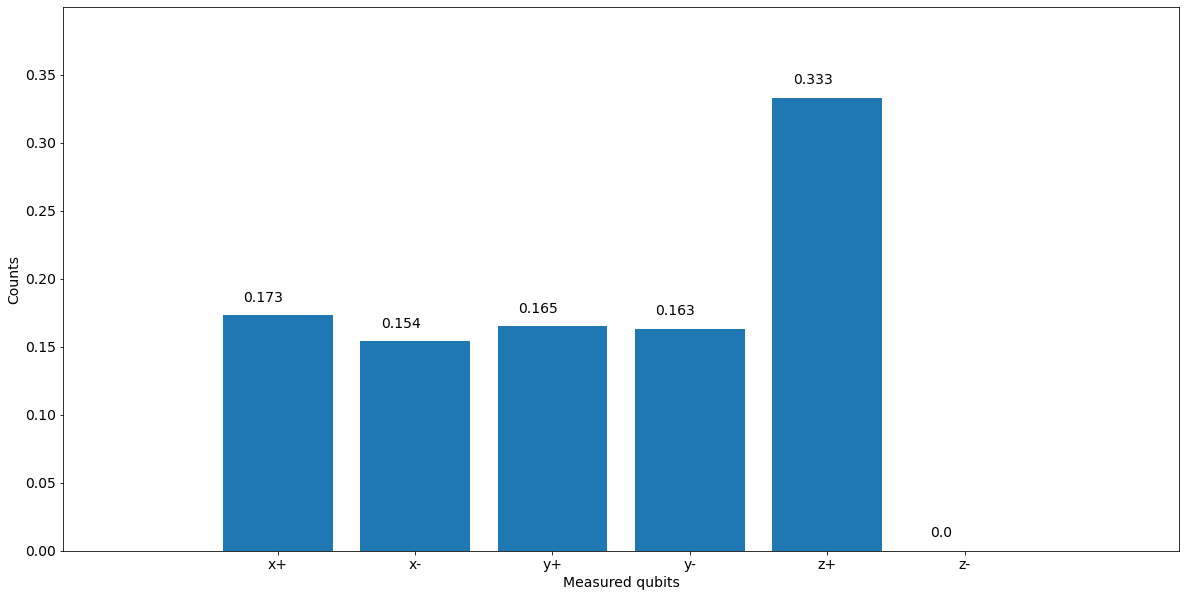

In [3]:
# Initialize the object using POVM effects and assign labels to them
seq = SequentialPOVMMeasurement(simple_povm_xyz, ["x+", "x-", "y+", "y-", "z+", "z-"])

# Prepare measured state z+
state = QuantumCircuit(1, 1)

results = seq.measure([["z+", "z-"], [["y+", "y-"], ["x+", "x-"]]], state)
seq.plot_histogram(results)

prob = ProbabilisticMeasurement(simple_povm_xyz, ["x+", "x-", "y+", "y-", "z+", "z-"])
results = prob.measure(state)
prob.plot_histogram(results)


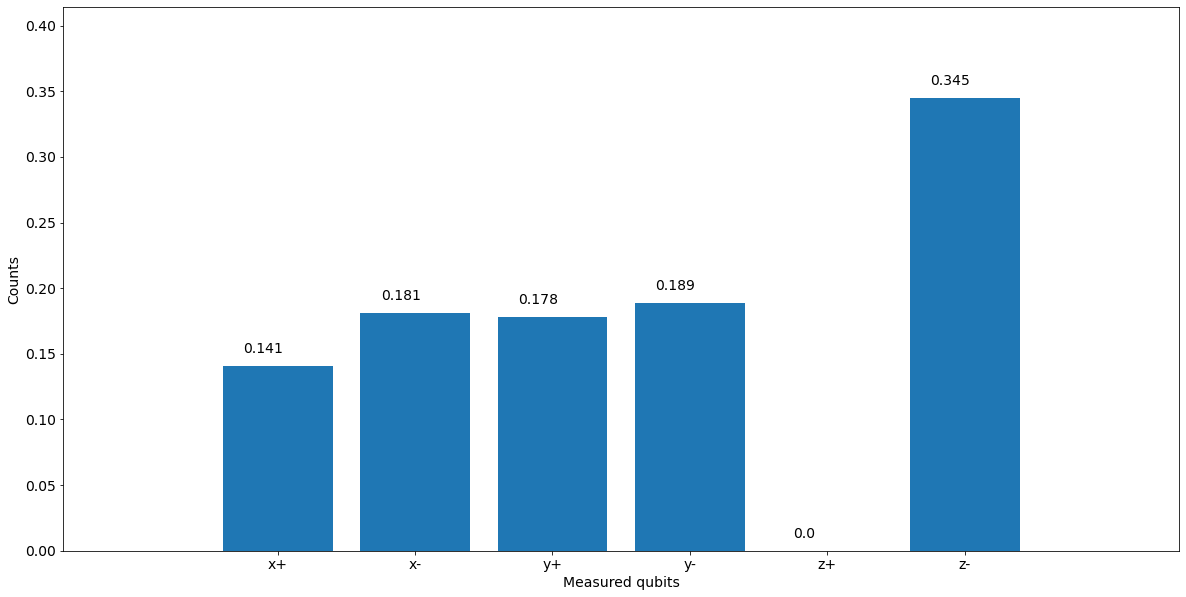

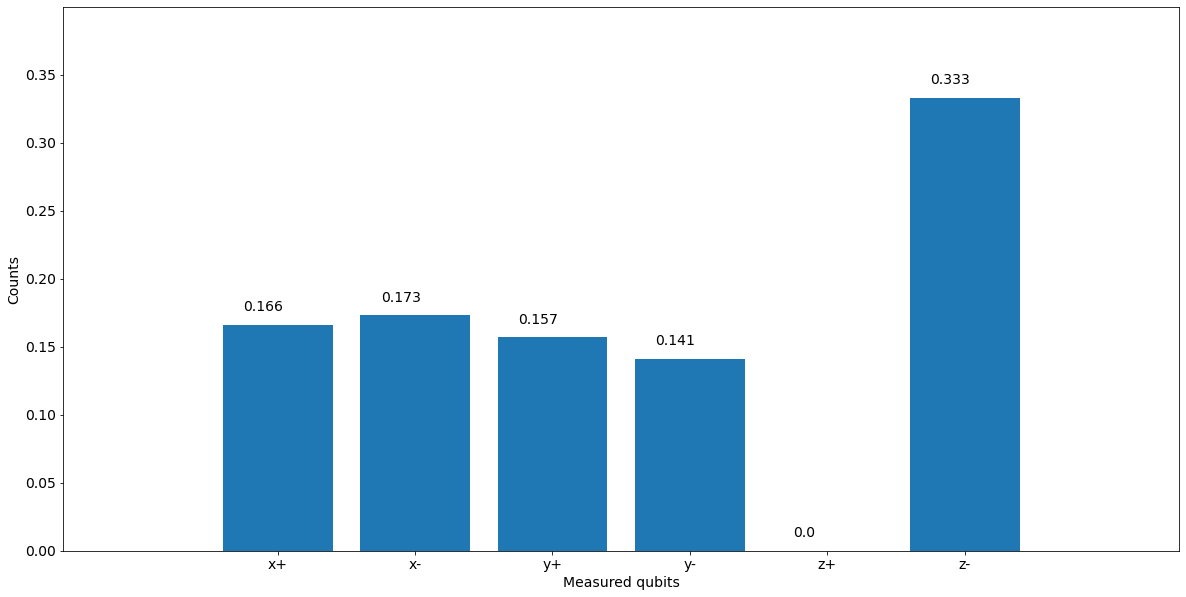

In [4]:
# Prepare measured state z+
state = QuantumCircuit(1, 1)
state.x(0)

results = seq.measure([["z+", "z-"], [["y+", "y-"], ["x+", "x-"]]], state)
seq.plot_histogram(results)

prob = ProbabilisticMeasurement(simple_povm_xyz, ["x+", "x-", "y+", "y-", "z+", "z-"])
results = prob.measure(state)
prob.plot_histogram(results)

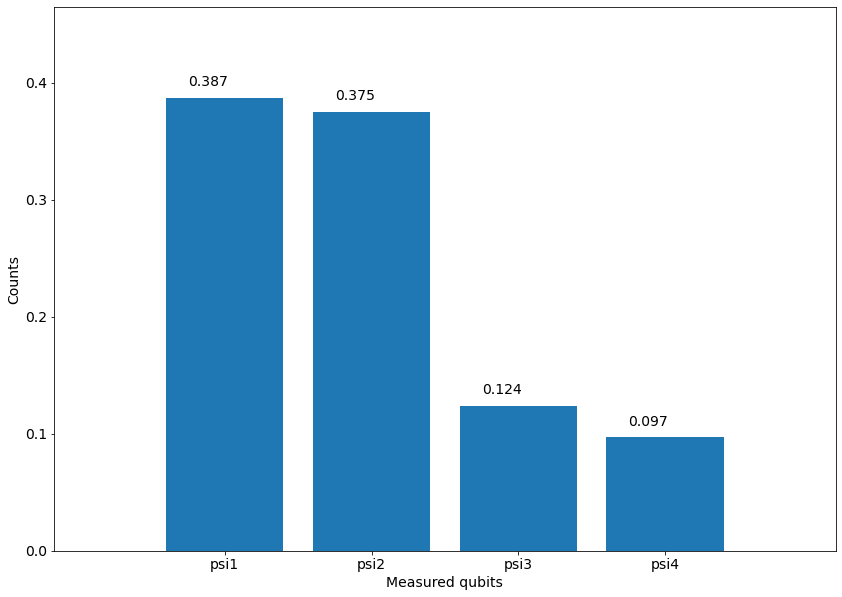

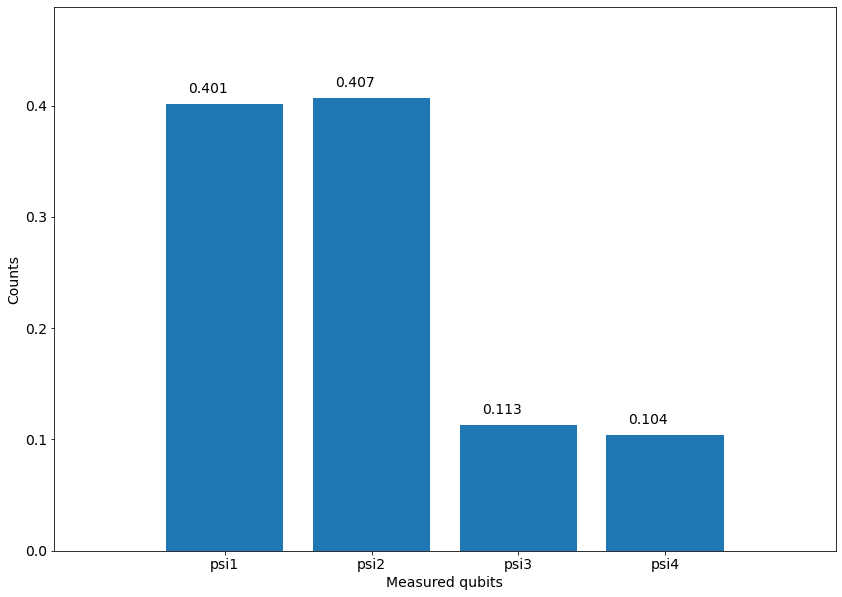

In [5]:
# Prepare measured state z+
state = QuantumCircuit(1, 1)
state.h(0)

# Initialize the object using POVM effects and assign labels to them
seq = SequentialPOVMMeasurement(povm_tetrahedron, ["psi1", "psi2", "psi3", "psi4"])
results = seq.measure([["psi1", "psi2"], ["psi3", "psi4"]], state)
seq.plot_histogram(results)


prob = ProbabilisticMeasurement(povm_tetrahedron, ["psi1", "psi2", "psi3", "psi4"])
results = prob.measure(state)
prob.plot_histogram(results)

Noise level is 0.0


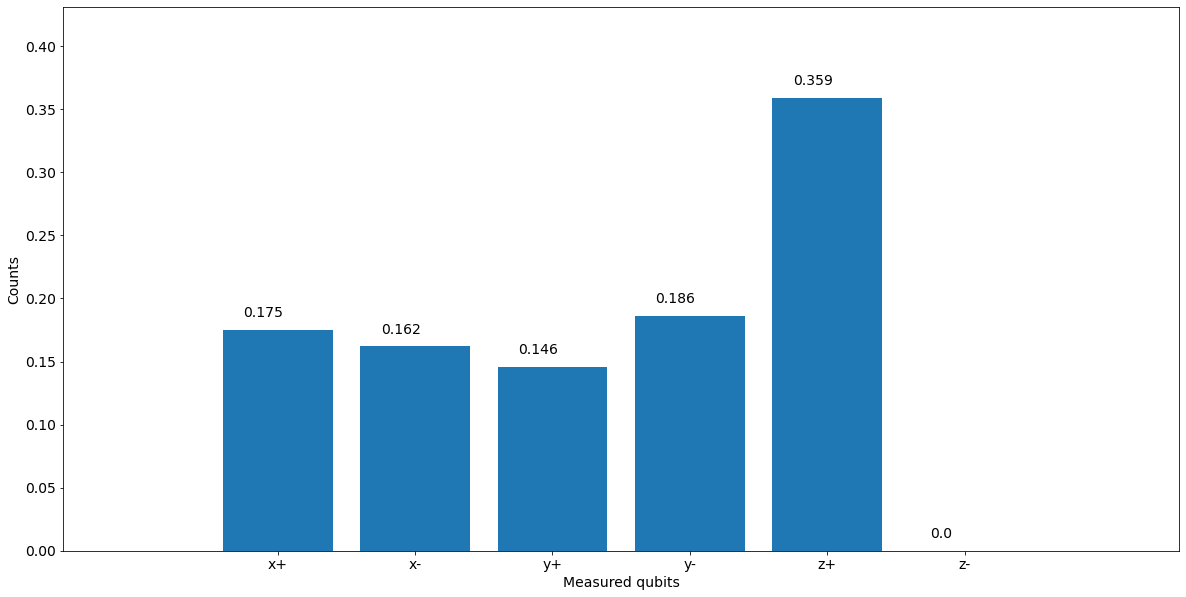

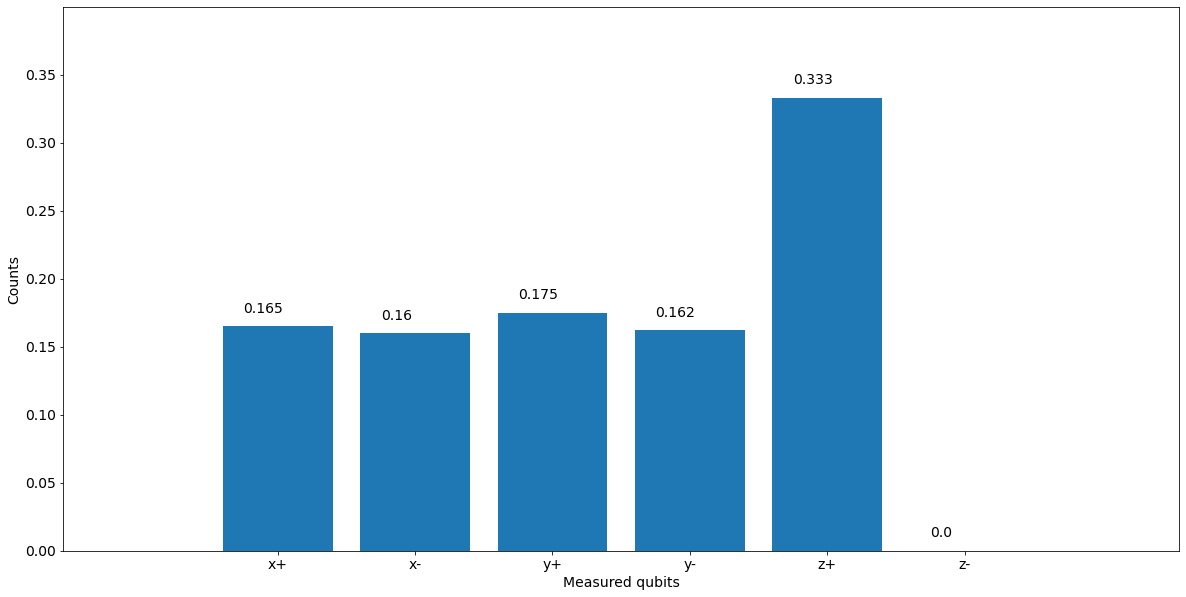

Noise level is 0.07142857142857142


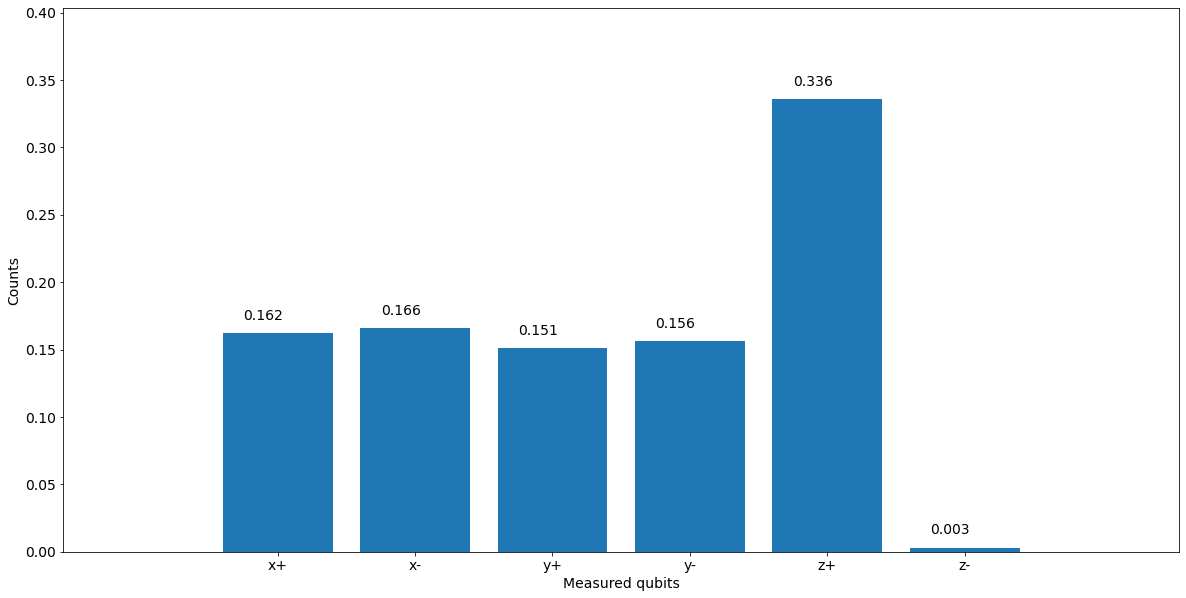

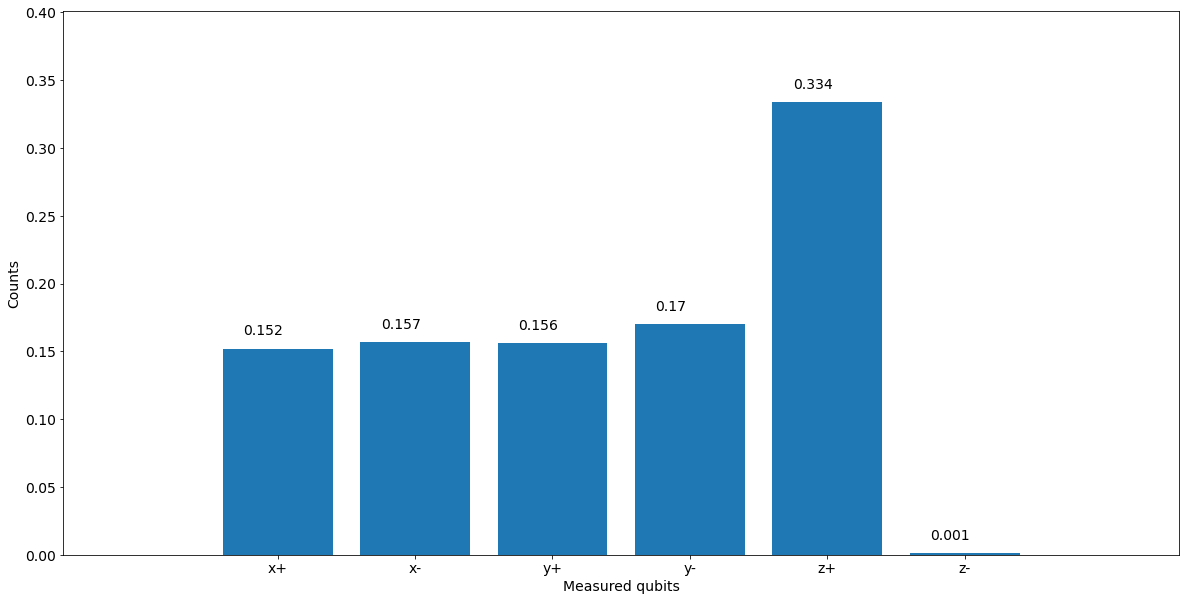

Noise level is 0.14285714285714285


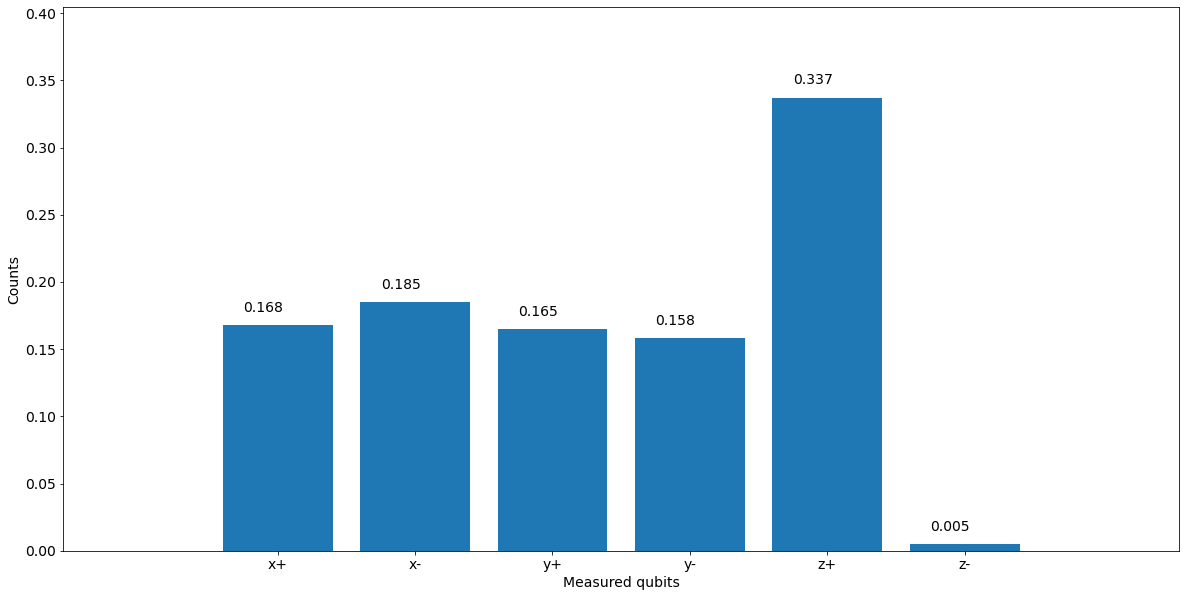

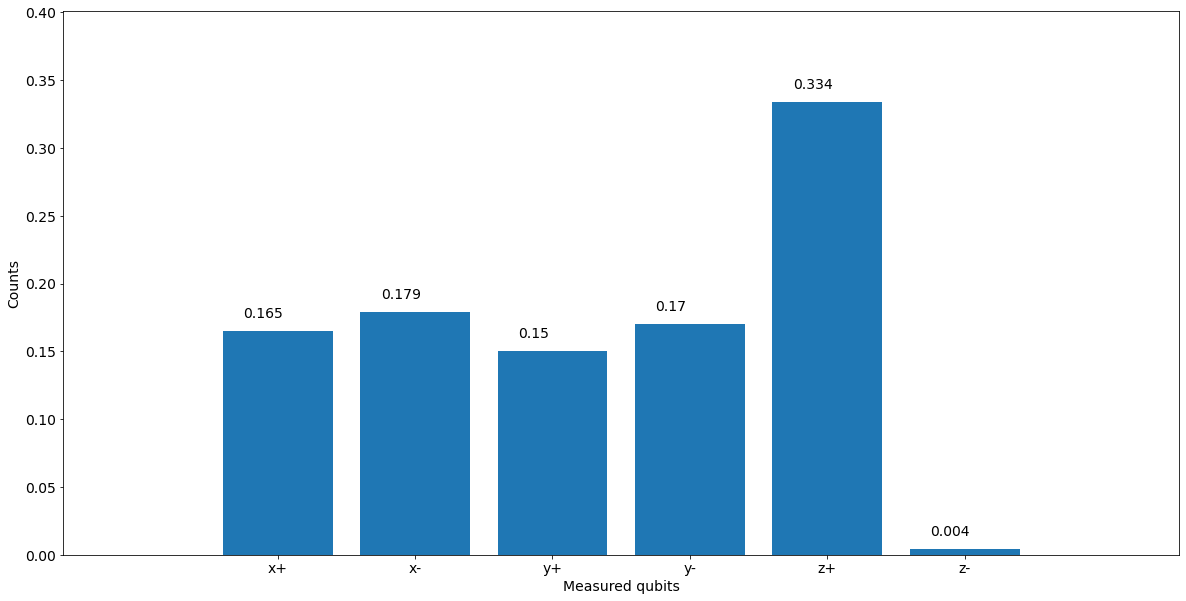

Noise level is 0.21428571428571427


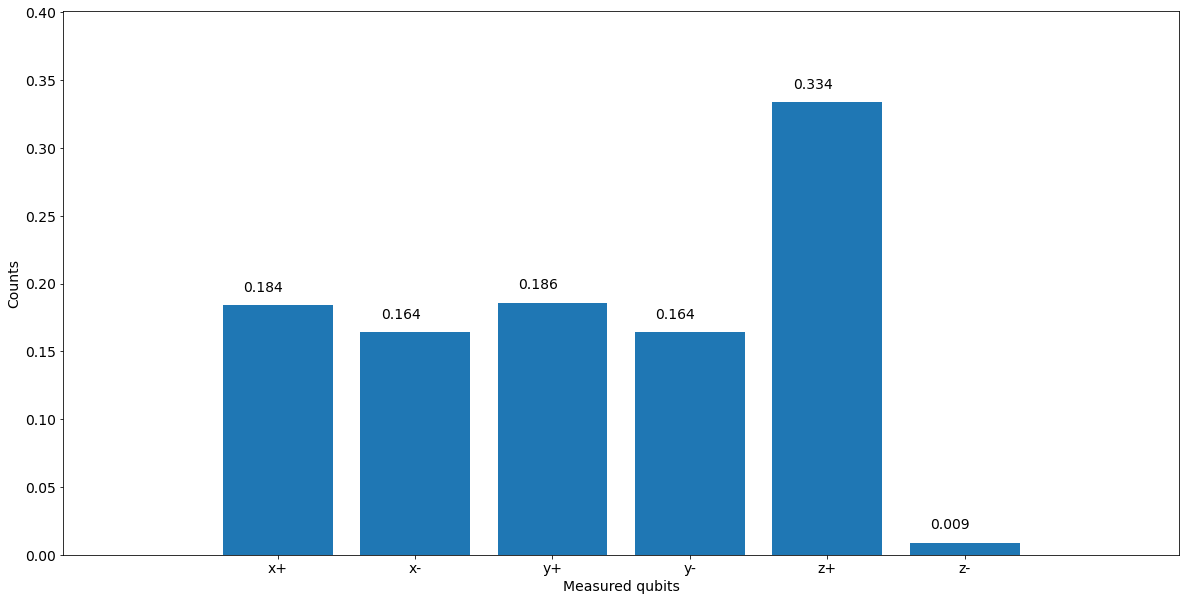

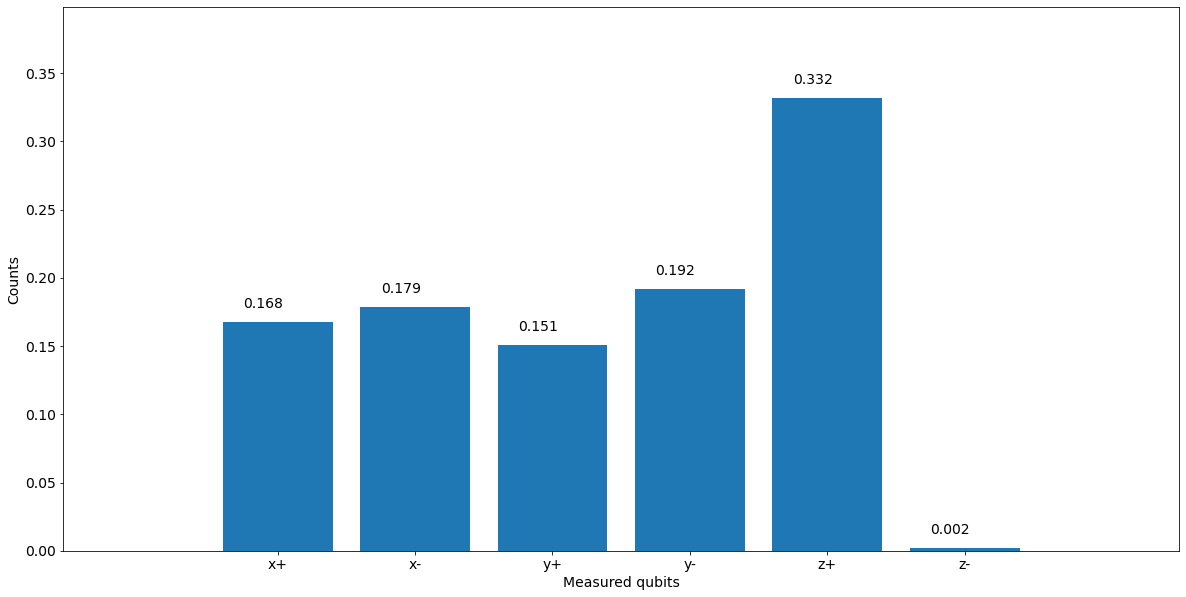

Noise level is 0.2857142857142857


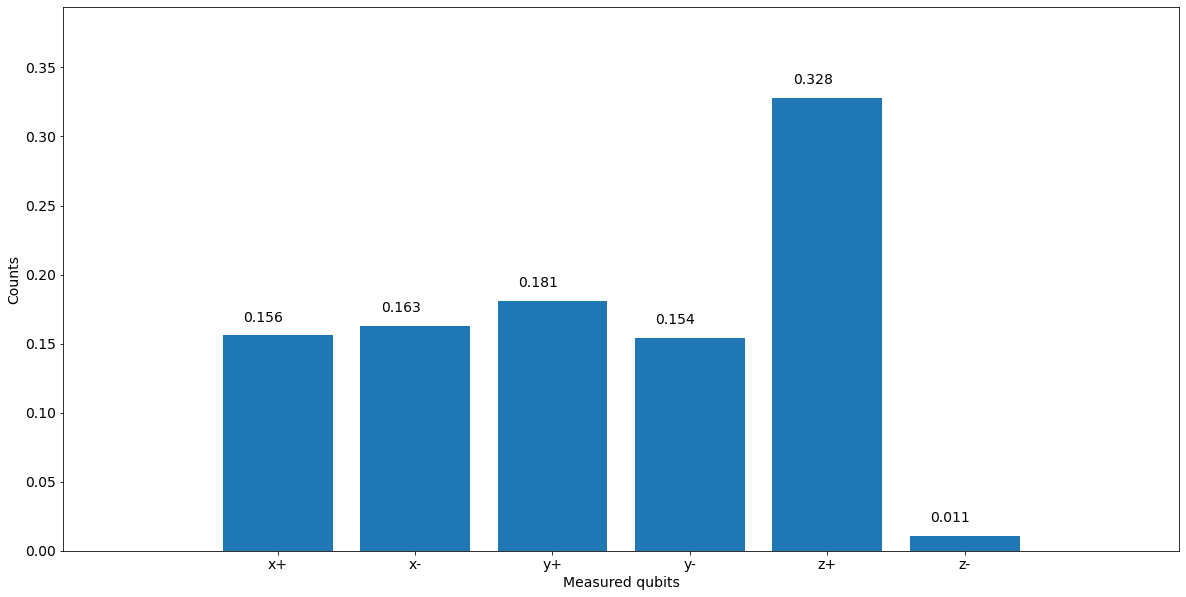

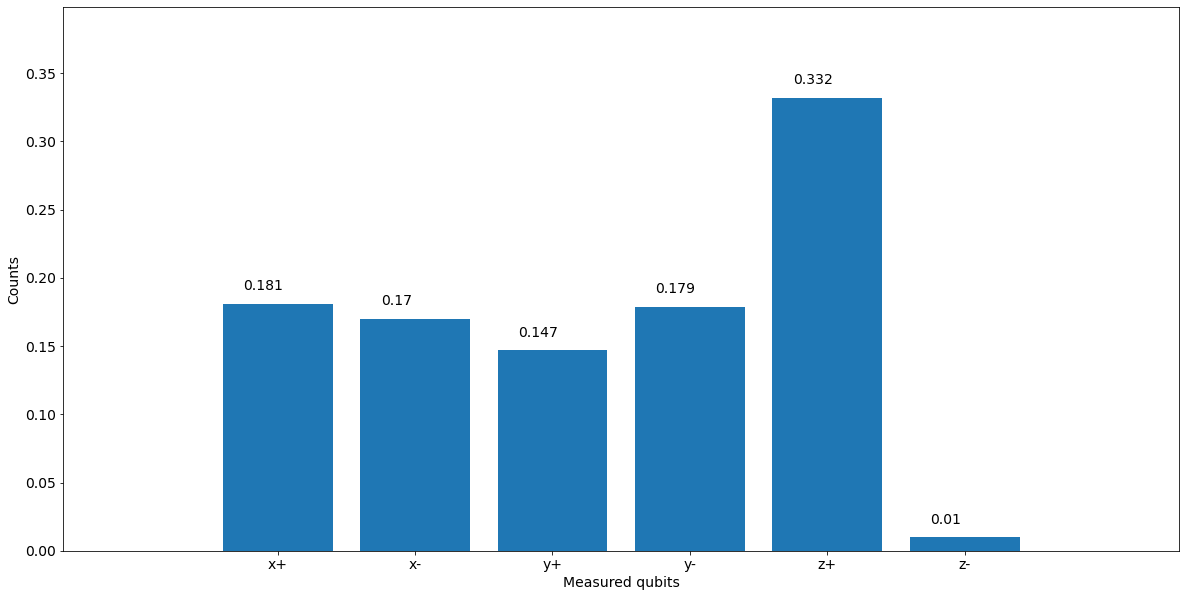

Noise level is 0.3571428571428571


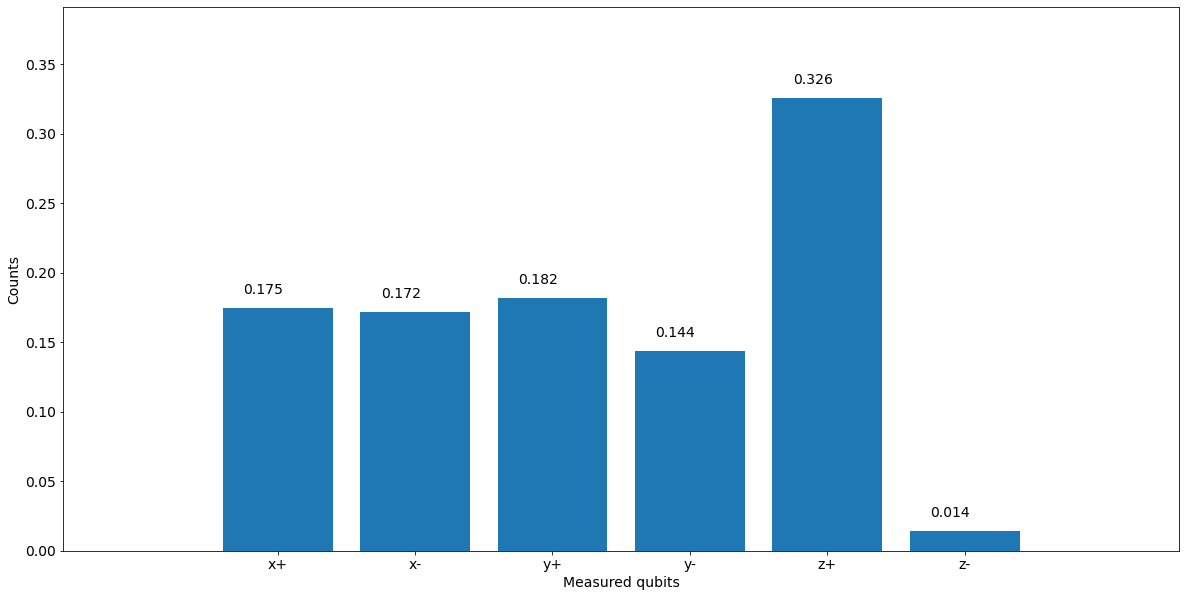

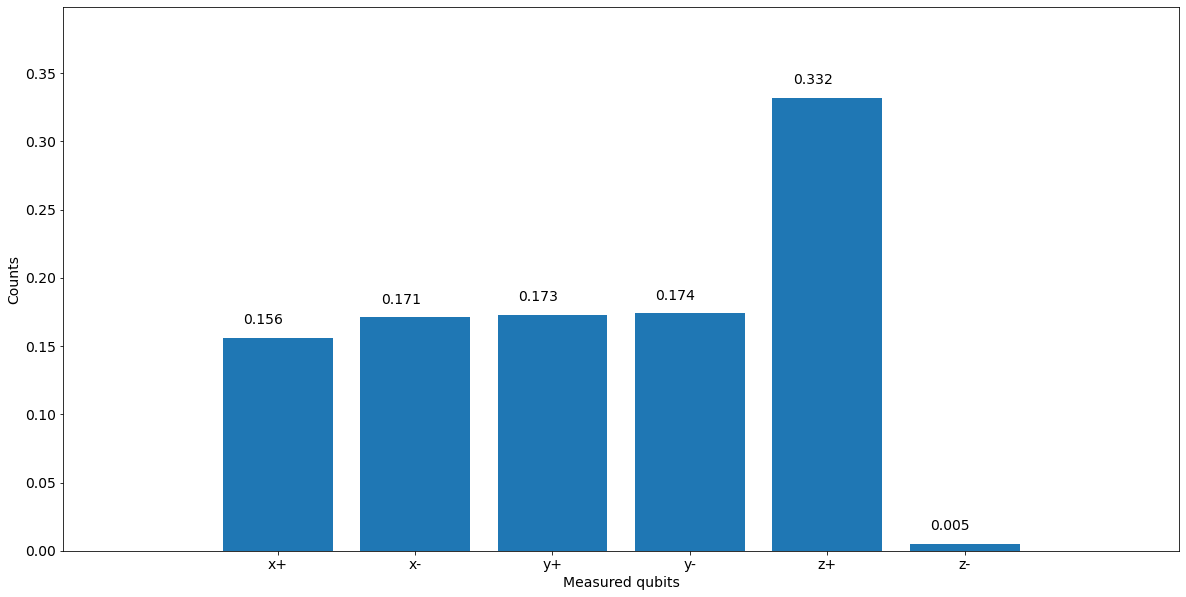

Noise level is 0.42857142857142855


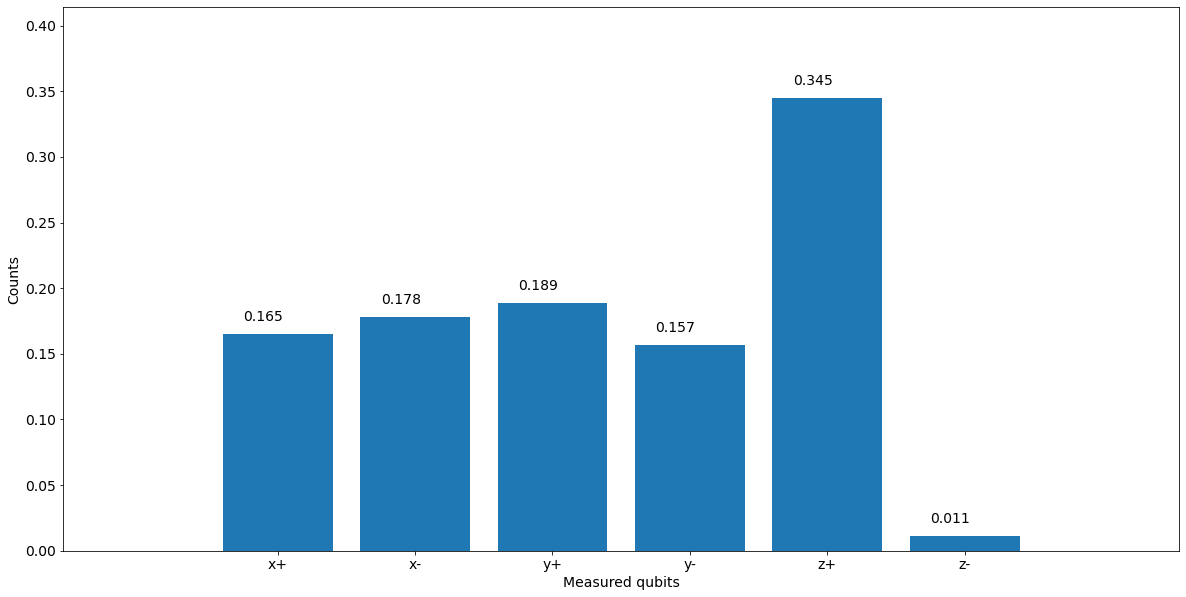

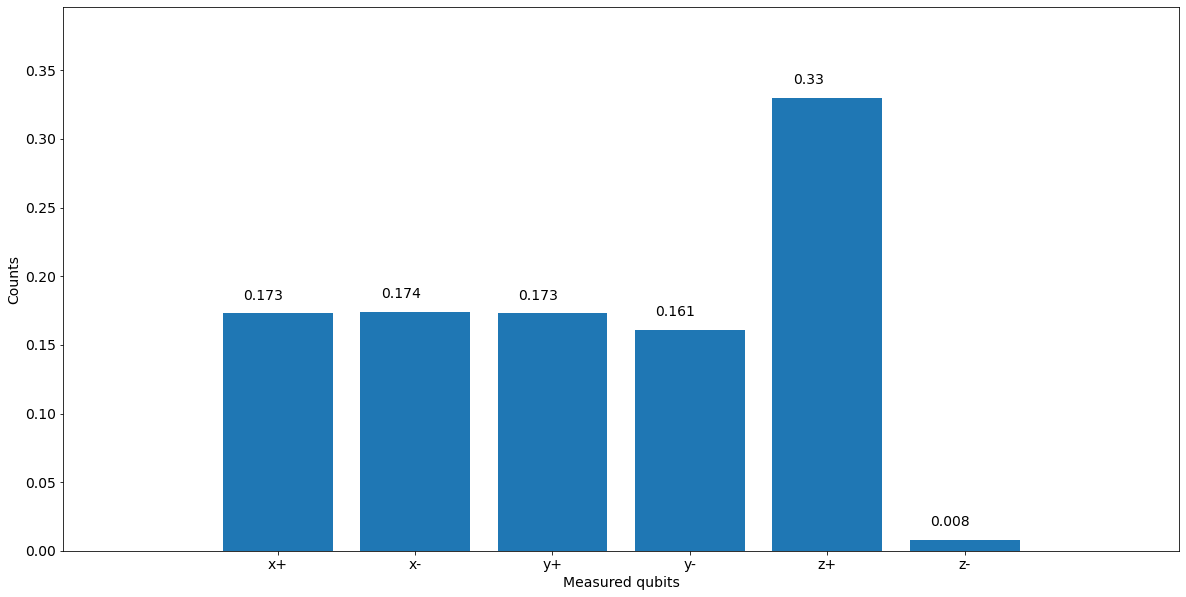

Noise level is 0.5


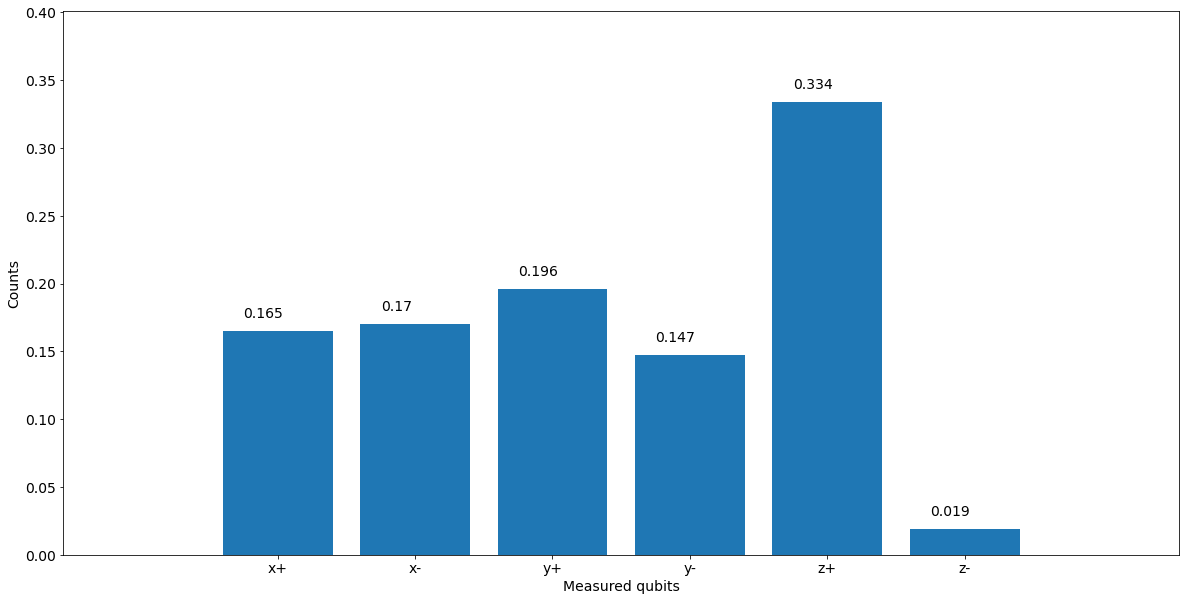

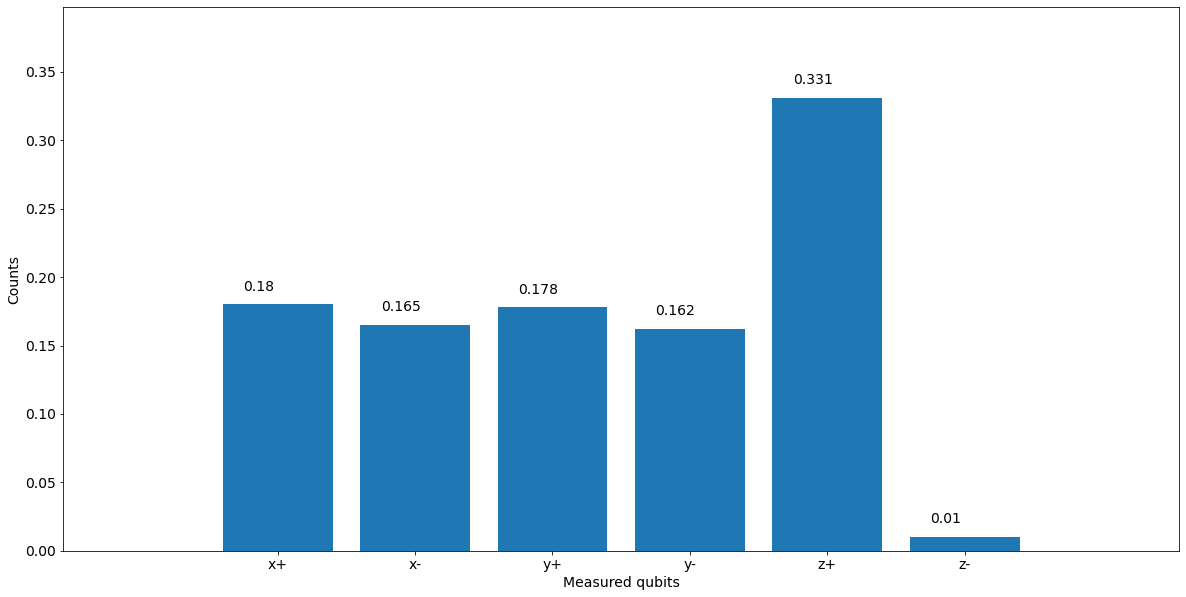

Noise level is 0.5714285714285714


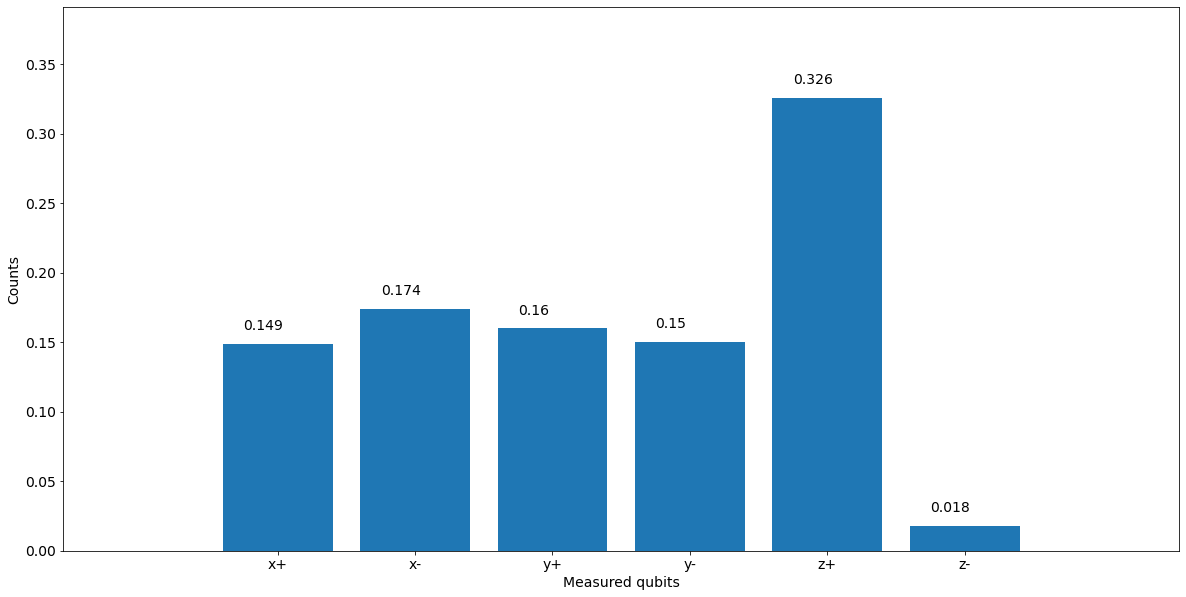

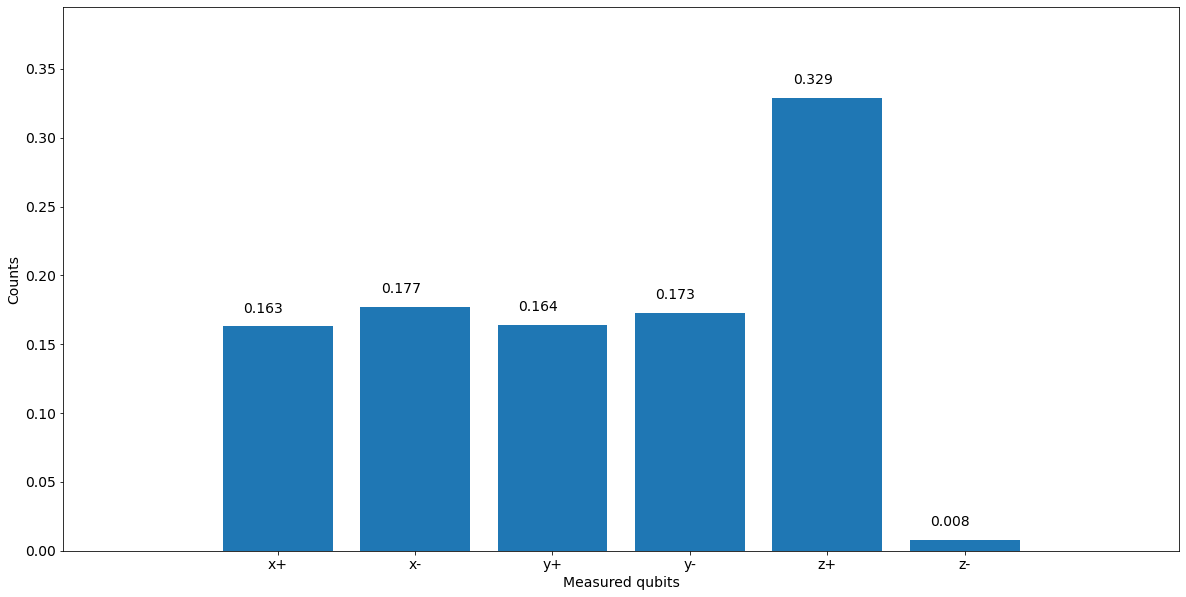

Noise level is 0.6428571428571428


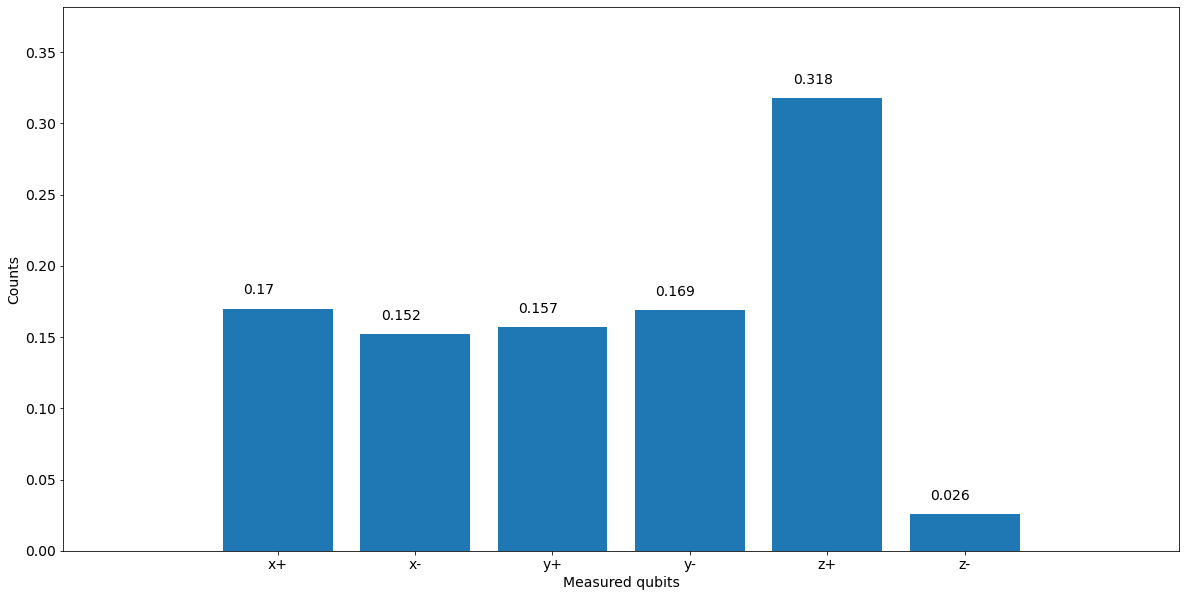

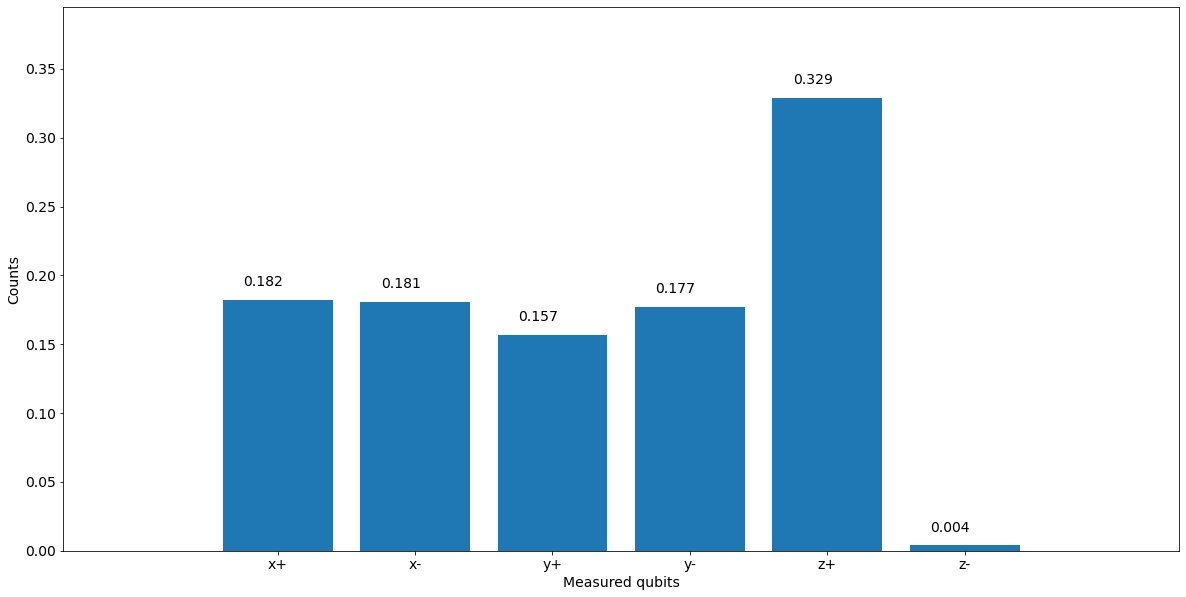

Noise level is 0.7142857142857142


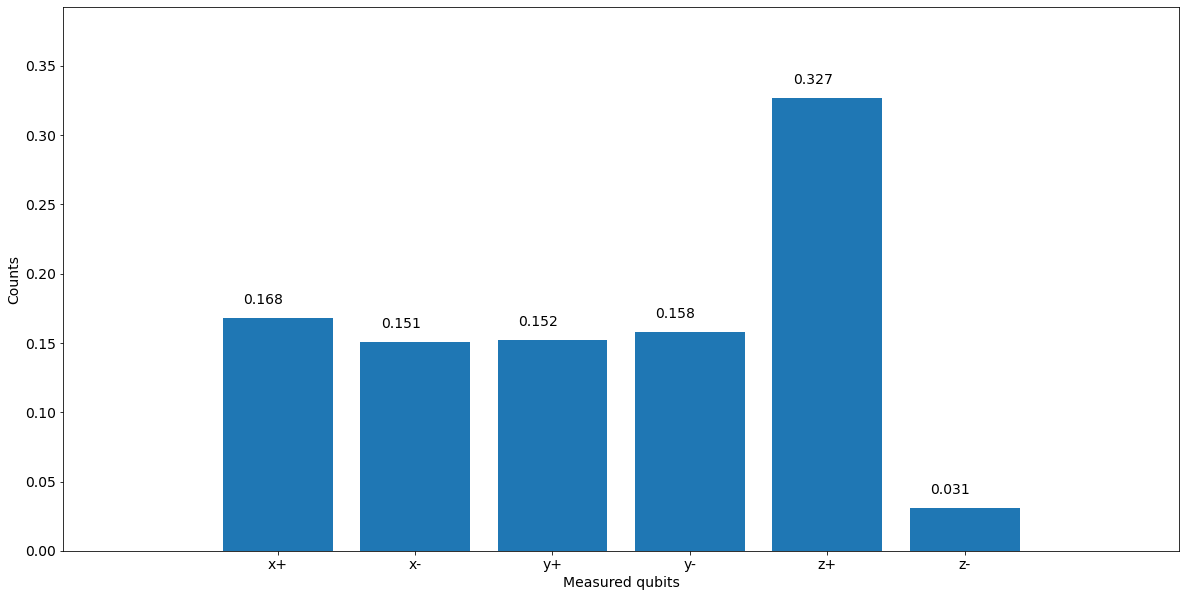

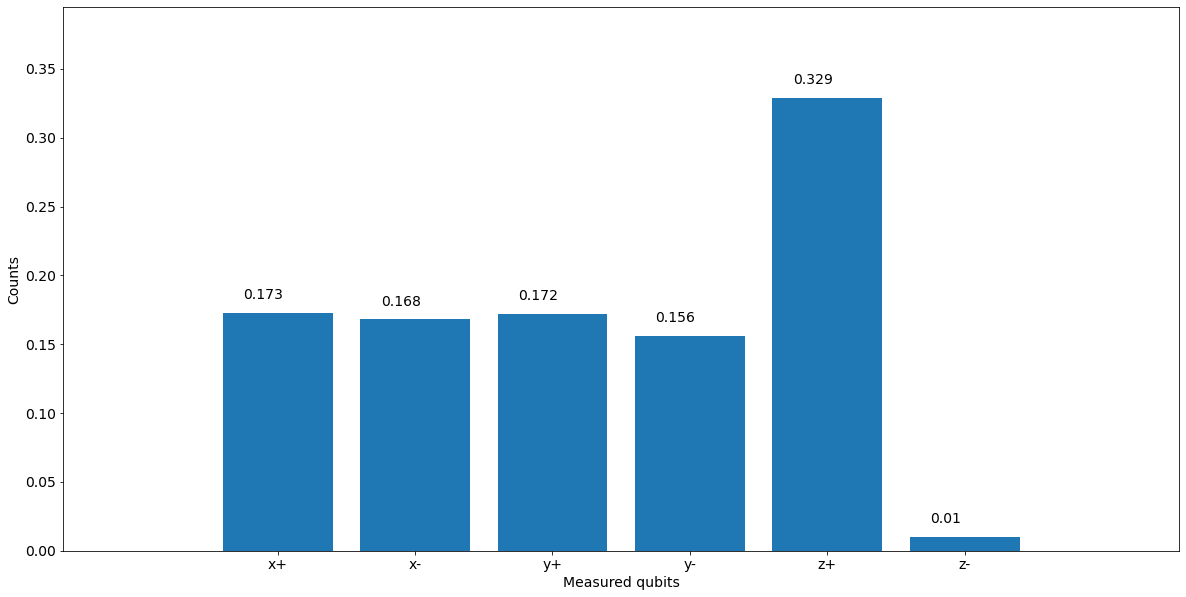

Noise level is 0.7857142857142857


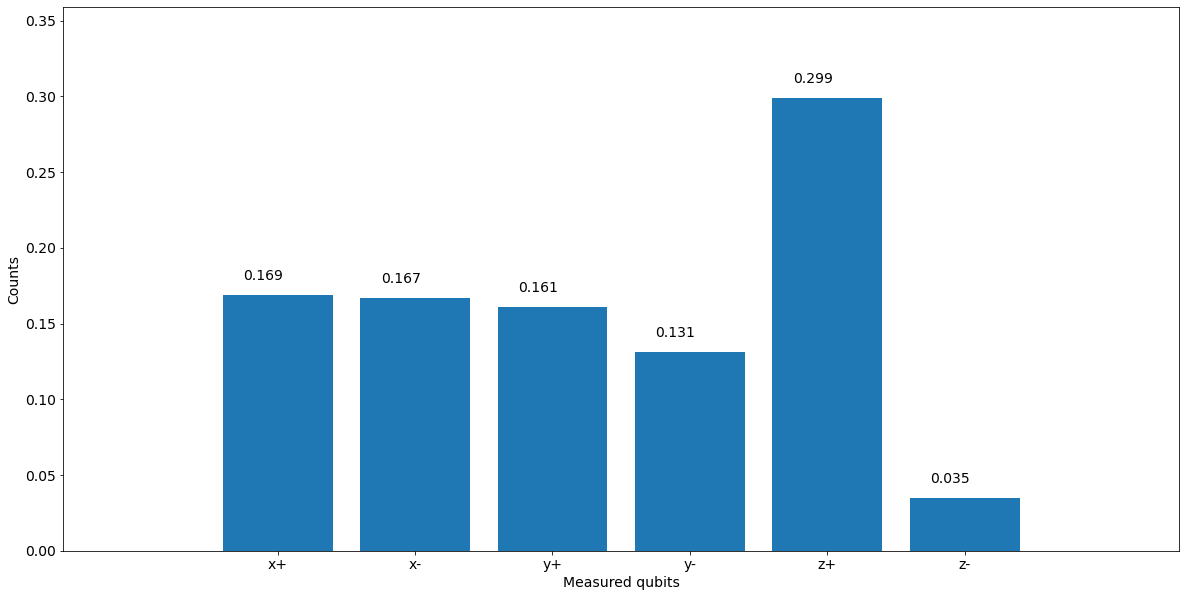

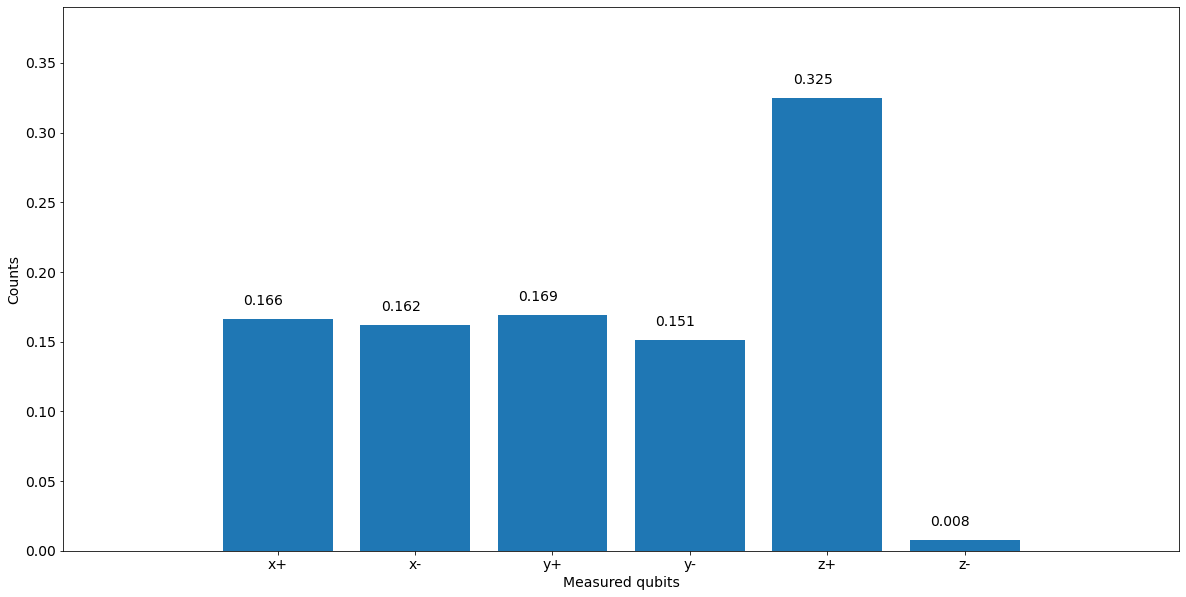

Noise level is 0.8571428571428571


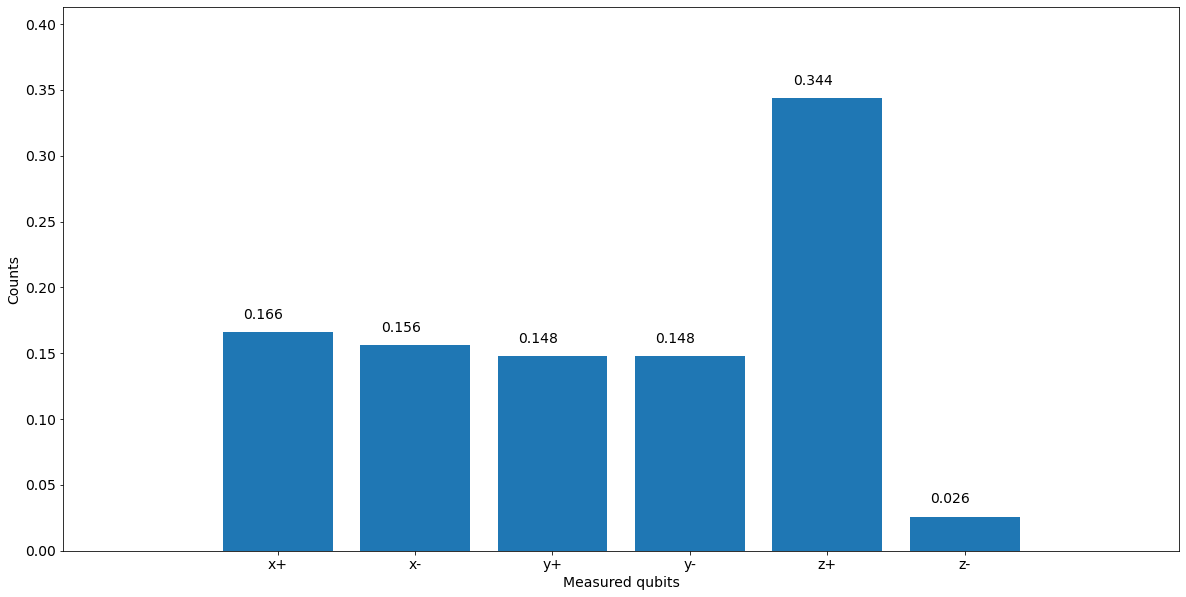

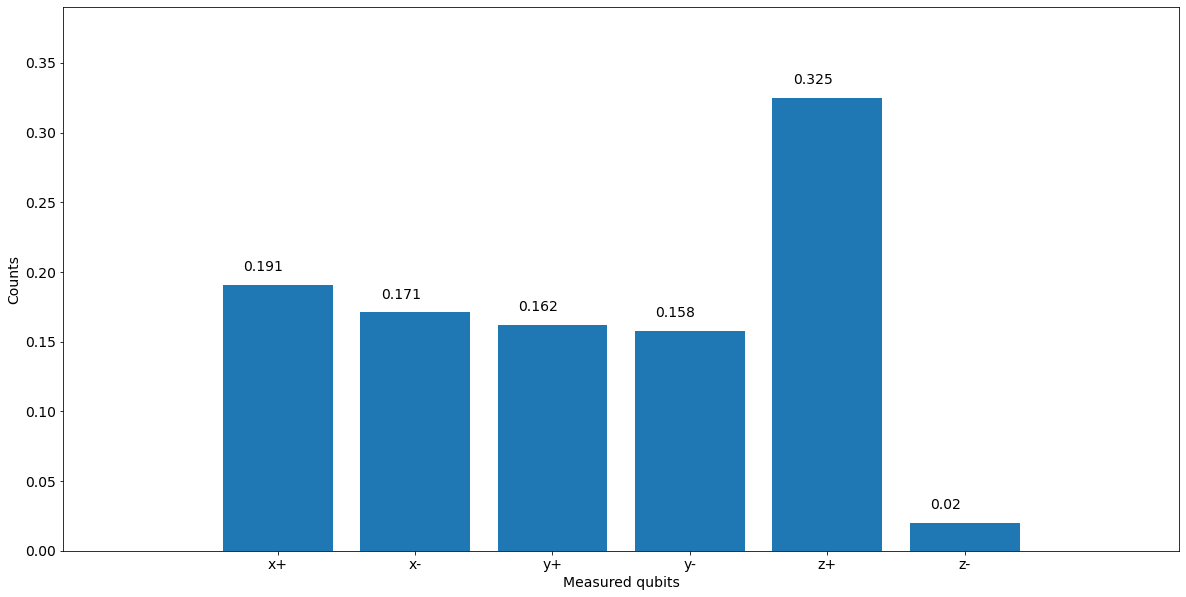

Noise level is 0.9285714285714285


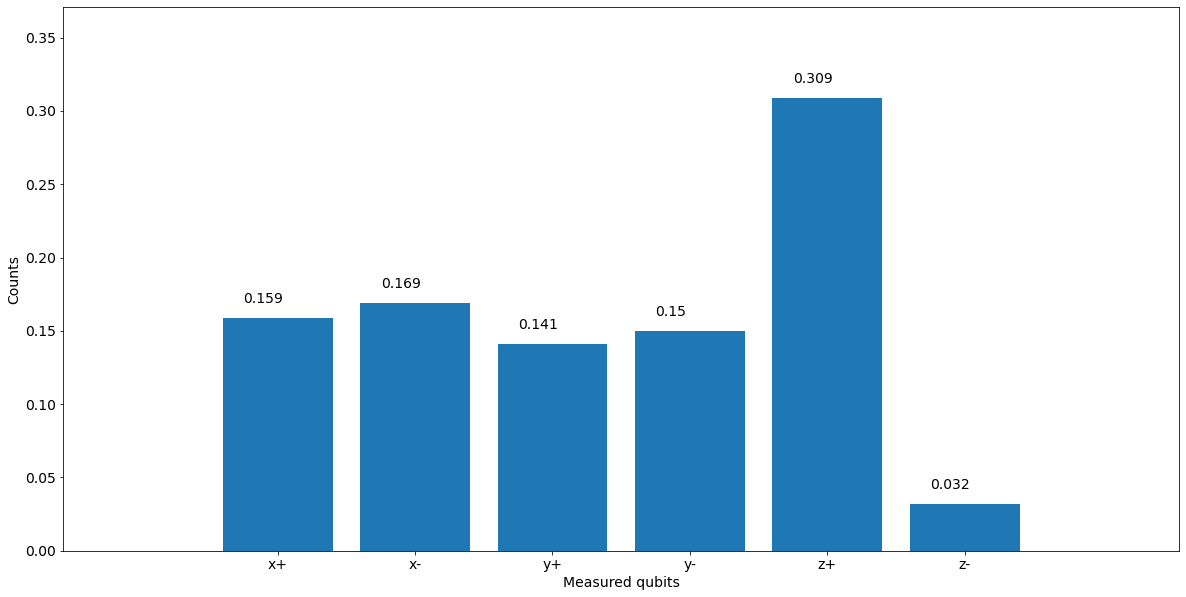

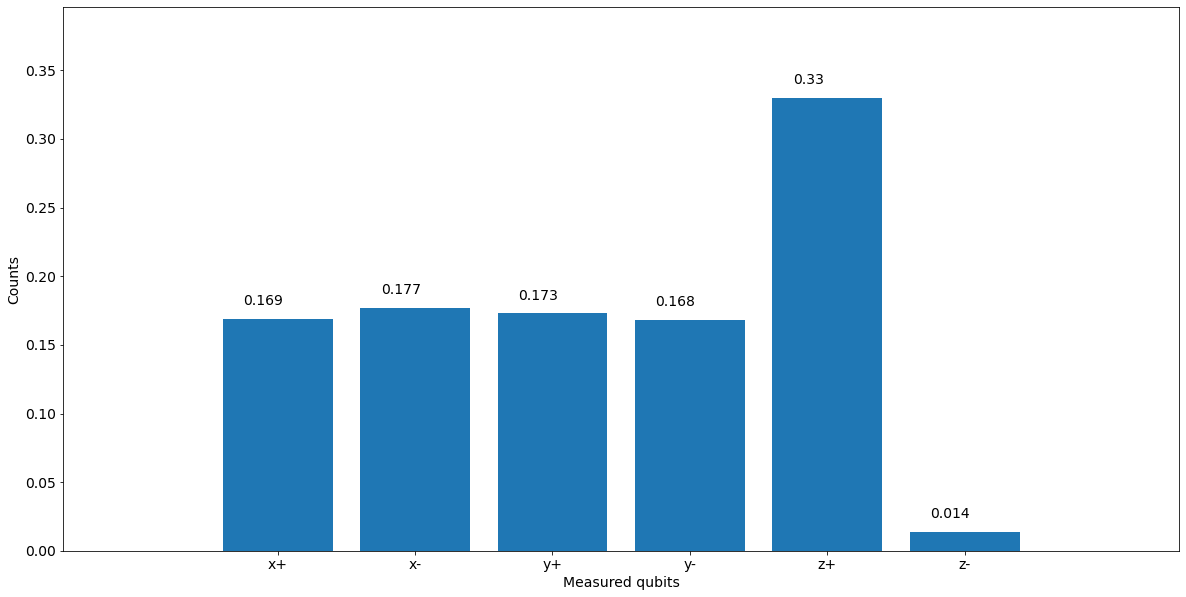

Noise level is 1.0


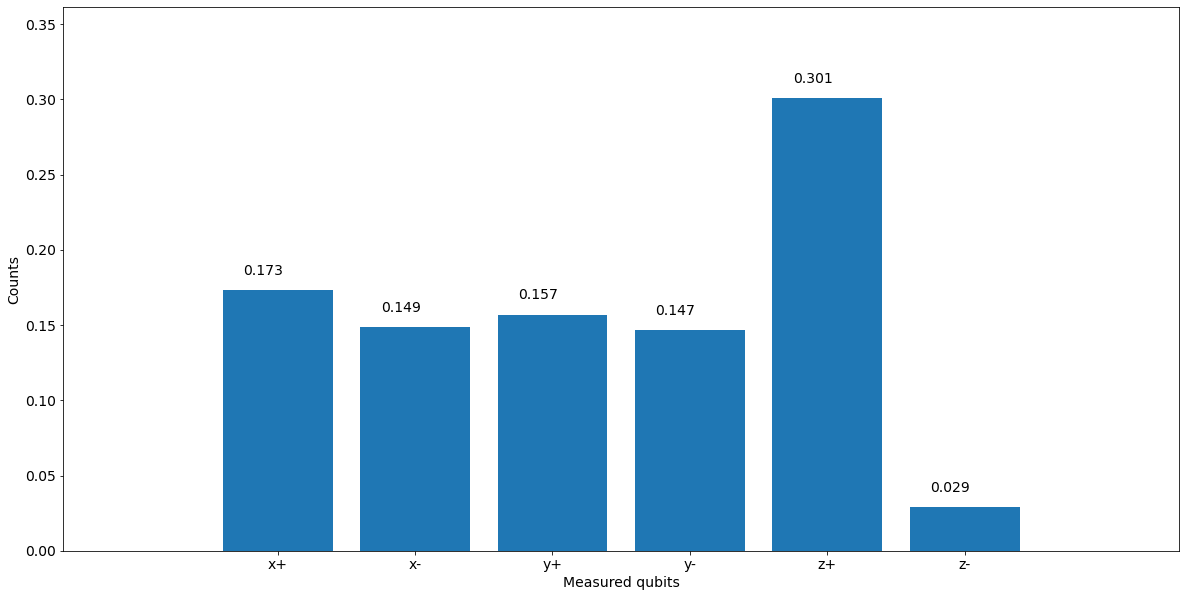

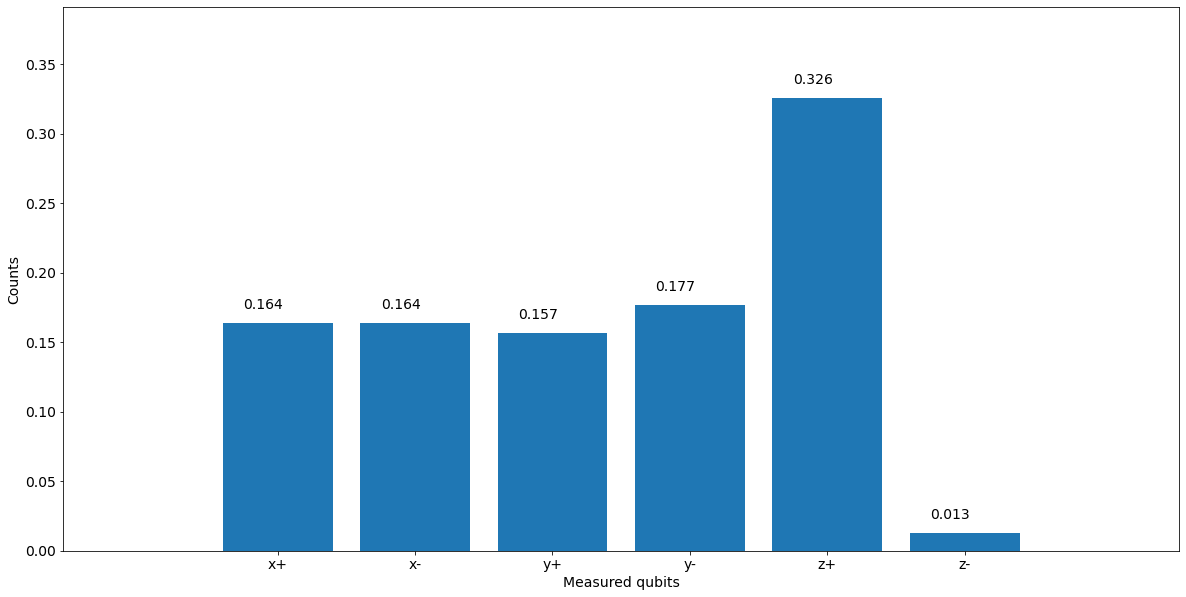

In [8]:
# Initialize the object using POVM effects and assign labels to them
seq = SequentialPOVMMeasurement(simple_povm_xyz, ["x+", "x-", "y+", "y-", "z+", "z-"])

# Prepare measured state z+
state = QuantumCircuit(1, 1)

scales = np.linspace(0, 1, 15)
for scale in scales:
    print(f"Noise level is {scale}")
    noise_model = scale_noise(NoiseModel().from_backend(dev), scale)
    sim_noise = AerSimulator(noise_model=noise_model)

    results = seq.measure([["z+", "z-"], [["y+", "y-"], ["x+", "x-"]]], state, sim_noise)
    seq.plot_histogram(results)

    prob = ProbabilisticMeasurement(simple_povm_xyz, ["x+", "x-", "y+", "y-", "z+", "z-"], sim_noise)
    results = prob.measure(state)
    prob.plot_histogram(results)